In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
df = pd.read_excel('../dataset/apple.xlsx')

In [5]:
df

,제품명,가격,리뷰수,등록일,찜하기
0,Apple 아이폰 14 프로 256GB [자급제],1683060,1257,2022.09.,211
1,Apple 에어팟 프로 2세대 (MQD83KH/A),297970,6971,2022.09.,697
2,Apple 아이폰 14 프로 128GB [자급제],1550000,933,2022.09.,190
3,Apple 아이패드 9세대 WIFI 64G 스페이스 그레이 (MK2K3KH/A),436100,2251,2021.10.,1640
4,Apple 아이폰 14 128GB [자급제],1074560,717,2022.09.,242
...,...,...,...,...,...
195,Apple 비츠바이닥터드레 핏 프로 Fit Pro,190000,178,2022.01.,82
196,에어팟 3세대 한쪽 에어팟 오른쪽 3세대 이어폰 유닛 단품,82900,456,2022.01.,207
197,Apple 아이폰XS 512GB (KT),123300,3,2018.11.,57
198,애플 아이폰12mini 미니 128GB 공기계/자급제,629000,41,2022.04.,296


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제품명     200 non-null    object
 1   가격      200 non-null    int64 
 2   리뷰수     200 non-null    int64 
 3   등록일     200 non-null    object
 4   찜하기     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


### 데이터 전처리
- 각종 정보 및 타입 수정

In [6]:
df["등록일"] = df["등록일"]+'01'
df["등록일"] = pd.to_datetime(df["등록일"])


In [10]:
df

,제품명,가격,리뷰수,등록일,찜하기
0,Apple 아이폰 14 프로 256GB [자급제],1683060,1257,2022-09-01,211
1,Apple 에어팟 프로 2세대 (MQD83KH/A),297970,6971,2022-09-01,697
2,Apple 아이폰 14 프로 128GB [자급제],1550000,933,2022-09-01,190
3,Apple 아이패드 9세대 WIFI 64G 스페이스 그레이 (MK2K3KH/A),436100,2251,2021-10-01,1640
4,Apple 아이폰 14 128GB [자급제],1074560,717,2022-09-01,242
...,...,...,...,...,...
195,Apple 비츠바이닥터드레 핏 프로 Fit Pro,190000,178,2022-01-01,82
196,에어팟 3세대 한쪽 에어팟 오른쪽 3세대 이어폰 유닛 단품,82900,456,2022-01-01,207
197,Apple 아이폰XS 512GB (KT),123300,3,2018-11-01,57
198,애플 아이폰12mini 미니 128GB 공기계/자급제,629000,41,2022-04-01,296


In [ ]:
# 제품명 분석
# 단어분석라이브러리 추가
from collections import Counter

#일단 리스트로변경
app = df["제품명"].str.split().tolist()
#이제 몽땅 합치자
product_names =[]
for row in app:
    product_names += row

#제품개수 세기(단어세기) 편의상 product_each(pe)에 담는다
pe = Counter(product_names)

pe.most_common(30)



    



In [30]:
#한글깨짐 처리코드
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
#폰트리스트보기
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

#폰트설정
plt.rcParams['font.family'] = 'NanumGothic'

### 가격대 분포를 보자
- 시각화

39


<AxesSubplot:xlabel='가격', ylabel='Count'>

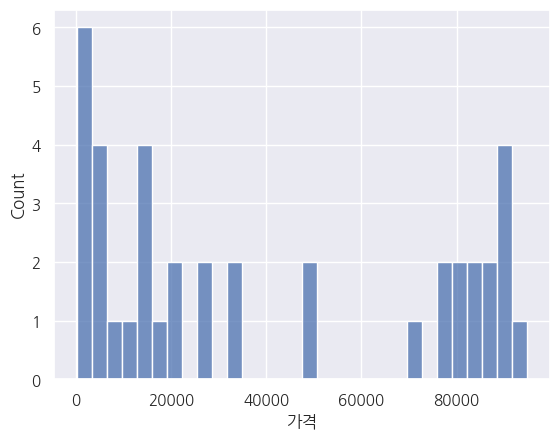

In [32]:
temp = df.loc[df['가격'] <= 100000]
print(len(temp))
plt.rcParams['font.family'] = 'NanumGothic'
sns.histplot(data=temp, x="가격",bins=30)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14524\3890684375.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="등록일", y="리뷰수", ci=None)


<AxesSubplot:xlabel='등록일', ylabel='리뷰수'>

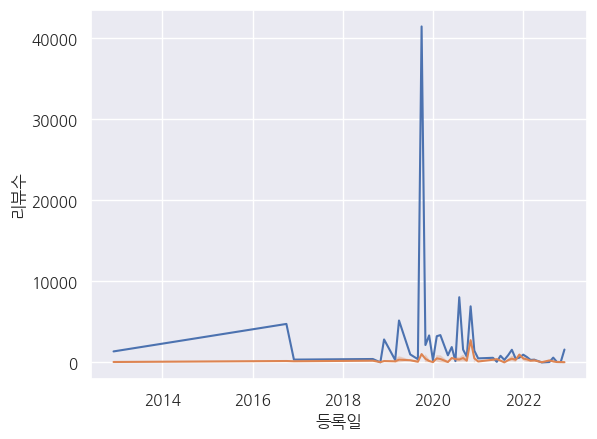

In [34]:
#등록일에 따른 패턴변화
sns.lineplot(data=df, x="등록일", y="리뷰수", ci=None)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14524\4278671185.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x="등록일",y="찜하기",ci=None)


<AxesSubplot:xlabel='등록일', ylabel='찜하기'>

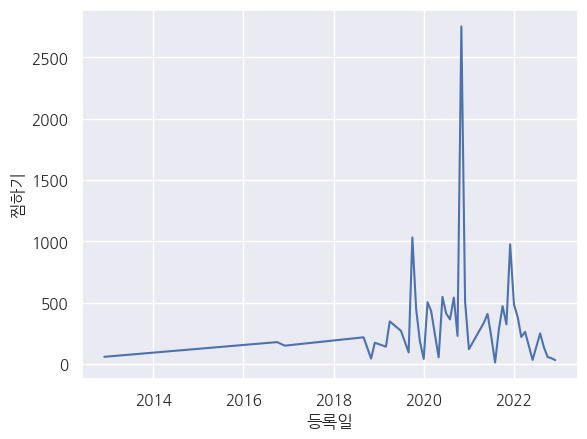

In [37]:
sns.lineplot(data=df,x="등록일",y="찜하기",ci=None)

In [39]:
#특정키워드가 랭킹과 관련이 있는가?(str.contains)
df[df["제품명"].str.contains('자급제')]

,제품명,가격,리뷰수,등록일,찜하기
0,Apple 아이폰 14 프로 256GB [자급제],1683060,1257,2022-09-01,211
2,Apple 아이폰 14 프로 128GB [자급제],1550000,933,2022-09-01,190
4,Apple 아이폰 14 128GB [자급제],1074560,717,2022-09-01,242
6,Apple 아이폰 13 미니 128GB [자급제],893000,2153,2021-09-01,821
9,Apple 아이폰 13 128GB [자급제],989000,1726,2021-09-01,563
12,Apple 아이폰 SE3 128GB [자급제],609800,563,2022-03-01,419
13,Apple 아이폰 13 256GB [자급제],1143890,977,2021-09-01,478
20,Apple 아이폰 13 프로 1TB [자급제],1603700,105,2021-09-01,81
25,Apple 아이폰 14 프로 맥스 256GB [자급제],1881000,423,2022-09-01,74
28,Apple 아이폰 12 미니 128GB [자급제],889990,975,2020-10-01,540
